### Classification (Quiz 21 - 41)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [23]:
df = pd.read_csv("claims_data.csv")
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.900,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.770,3008,1,no,southeast,yes,1725.5523
2,28,male,33.000,3009,3,no,southeast,no,0.0000
3,33,male,22.705,10009,0,no,northwest,no,0.0000
4,32,male,28.880,8010,0,no,northwest,yes,3866.8552


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   steps            1338 non-null   int64  
 4   children         1338 non-null   int64  
 5   smoker           1338 non-null   object 
 6   region           1338 non-null   object 
 7   insurance_claim  1338 non-null   object 
 8   claim_amount     1338 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 94.2+ KB


In [25]:
df.describe()

,age,bmi,steps,children,claim_amount
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,5328.623318,1.094918,9611.312287
std,14.049960,6.098187,2453.643236,1.205493,13450.624483
min,18.000000,15.960000,3000.000000,0.000000,0.000000
25%,27.000000,26.296250,3008.000000,0.000000,0.000000
50%,39.000000,30.400000,4007.000000,1.000000,2748.484475
75%,51.000000,34.693750,8004.000000,2.000000,13045.979513
max,64.000000,53.130000,10010.000000,5.000000,63770.428010


#### QUESTION 21

What proportion of individuals in this dataset would be classified as overweight or obese (BMI of greater than 25)?

In [26]:
total_rows = df.shape[0]
overweight = (df['bmi']>25).sum()
overweight_prop = overweight/total_rows

print(f'% of overweight: {overweight_prop:.0%}')

% of overweight: 82%


#### QUESTION 22

Is the Poisson distribution a good choice to model the distribution of the number of children in this dataset?

In [27]:
df['children']

mean_n = df['children'].mean()
var = np.var(df['children'], ddof=1)
print(f'Mean: {mean_n}, Var: {var}')

Mean: 1.0949177877429, Var: 1.453212745666905


**ANSWER** : *No, the variance is significantly higher than the mean, suggesting overdispersion relative to the Poisson distribution.*

#### QUESTION 23

If we assumed that age of this group was normally distributed, then given the mean and standard deviation of age in the data set, calculate the number of individuals we would expect to be aged 60 or older.

Use 60 exactly as the cutoff point on the distribution, and round to the nearest integer.   
Then compare this with the number actually aged 60 or older.   
Which of the following is true?

In [28]:
# Calculate the mean and standard deviation of age
mean_age = df['age'].mean()
std_age = df['age'].std()
N = len(df)

In [29]:
# Calculate the z-score for age 60
age_cutoff = 60
z_score = (age_cutoff - mean_age) / std_age

# Calculate the cumulative probability for this z-score
p_less_than_60 = stats.norm.cdf(z_score)

# Probability of age 60 or older
p_60_or_older = 1 - p_less_than_60

# Expected number of individuals aged 60 or older
expected_num_60_or_older = round(N * p_60_or_older)

# Actual number of individuals aged 60 or older in the dataset
actual_num_60_or_older = (df['age'] >= 60).sum()

# Print the results
print(f'Mean age: {mean_age:.2f}')
print(f'Standard deviation of age: {std_age:.2f}')
print(f'Expected number of individuals aged 60 or older: {expected_num_60_or_older}')
print(f'Actual number of individuals aged 60 or older: {actual_num_60_or_older}')

Mean age: 39.21
Standard deviation of age: 14.05
Expected number of individuals aged 60 or older: 93
Actual number of individuals aged 60 or older: 114


**ANSWER** : *There are 21 more individuals 60 or older than the normal distribution would suggest*

#### QUESTION 24

Create a joint plot on the age and BMI variables. What summarises best what you see?

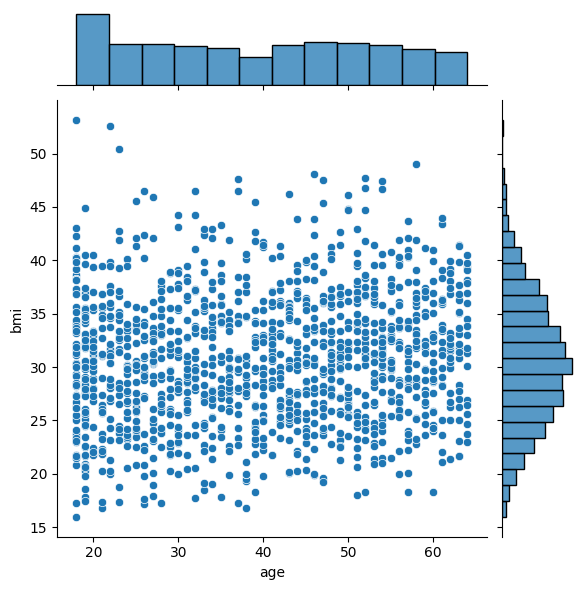

In [30]:
# Assuming 'age' and 'BMI' are columns in your dataset
sns.jointplot(x='age', y='bmi', data=df, kind='scatter')

# Display the plot
plt.show()


In [31]:
df[["age", "bmi"]].corr()

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


**ANSWER** : *There is not an easily discernible pattern in the plot, but the correlation coefficient is 0.11, which is statistically significantly different from zero, suggesting that older people tend to have higher BMIs.*

#### QUESTION 25

Use the appropriate model from the sklearn library (with default parameters unless specified otherwise) to fit a logistic regression model to the data, with insurance_claim as your target variable, using all other fields apart from claim_amount and creating dummy variables for the categorical variables in the data, dropping the first in each instance.

Do a test-train split holding out 33% of the data for the test set, using a random seed of 42 for the split.   
Convert your target variable to a binary 0 or 1, where 1 indicates that there was a claim.    
What proportion of claim indicators in the test set are correctly predicted?



In [32]:
#converting target into binary
df['insurance_claim'] = (df['insurance_claim'] == 'yes').astype(int)

#separate
y= df['insurance_claim']
X = df.drop(['insurance_claim', 'claim_amount'], axis=1) 

#creating dummy columns

cat_cols = df.select_dtypes(include= object).columns

X = pd.get_dummies(X, columns=cat_cols, drop_first= True)

#Splitting into train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state= 42)

Log_R = LogisticRegression(max_iter= 10000)
Log_R.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [33]:
from sklearn.metrics import classification_report, accuracy_score
#Model Evaluations 

y_preds = Log_R.predict(X_test)
CR = classification_report(y_test, y_preds)
accuracy = accuracy_score(y_test, y_preds)

print(f'*****Classification Report******\n{CR}\n\nAccuracy Score: {accuracy:.2%}')

*****Classification Report******
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       181
           1       0.90      0.88      0.89       261

    accuracy                           0.87       442
   macro avg       0.87      0.87      0.87       442
weighted avg       0.87      0.87      0.87       442


Accuracy Score: 87.10%


#### Question 26

Now fit another logistic regression, this time using the statsmodels library to do so, with default parameters.

Be sure to add a constant to your X matrices, both train and test (you might want to check the statsmodels documentation for the add_constant function).

Which of the following best summarises the results?

In [34]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Converting the bools into numericals 
bools_col = X.select_dtypes(include = ['bool']).columns
X[bools_col] = X[bools_col].astype(int)

#Add a contant to the features for intercept
X_trans = sm.add_constant(X)

print(f'Shape of X matrix: {X_trans.shape}\nShape of Targets: {y.shape}')

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X_trans,y, test_size=0.33, random_state= 42)

#Fitting
log_model = sm.Logit(y_train, X_train).fit()

#Printing the summary of the model
print(log_model.summary())

Shape of X matrix: (1338, 10)
Shape of Targets: (1338,)
Optimization terminated successfully.
         Current function value: 0.368829
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        insurance_claim   No. Observations:                  896
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            9
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.4572
Time:                        15:52:59   Log-Likelihood:                -330.47
converged:                       True   LL-Null:                       -608.78
Covariance Type:            nonrobust   LLR p-value:                4.241e-114
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.4037      1.374  

*ANSWER*: Age, BMI, number of children and smoker status significantly affect the likelihood of an insurance claim. Number of steps and sex are not significant. There appear to be some regional effects, but these are not strongly significant.

#### Question 27

What is the primary reason for using random forests instead of a single decision tree?

***ANSWER***: Decision trees suffer from high variance, and random forests reduce this variance by averaging multiple trees, each fitted to a subset of the observations and ensuring these trees are decorrelated by using only a subset of the available predictors.

#### Question 28

Now fit a random forest with 100 trees and a random seed of 101, and default parameters for the rest.

Which of the following sets out the number of false negatives and false positives in the confusion matrix on the test data?

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state= 42)


RFC = RandomForestClassifier(n_estimators=100, random_state=101)

# fitting the model
RFC.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = RFC.predict(X_test)

# Step 6: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Print the confusion matrix
print(f"Confusion Matrix: {cm}")

cr= classification_report(y_test, y_pred)
print(f"Classification Report: {cr}")


Confusion Matrix: [[176   5]
 [  8 253]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96       181
           1       0.98      0.97      0.97       261

    accuracy                           0.97       442
   macro avg       0.97      0.97      0.97       442
weighted avg       0.97      0.97      0.97       442



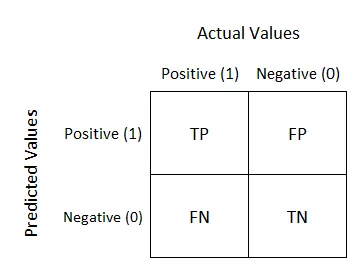

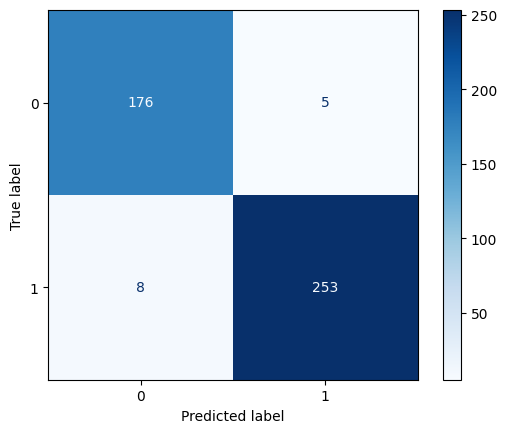

In [36]:
# Optionally, display the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC.classes_)
disp.plot(cmap='Blues')

In [37]:
TP =cm[0][0]
FP =cm[0][1]
FN =cm[1][0]
TN =cm[1][1]

print(f'False Negative: {FN}\n False Positive: {FP}')

False Negative: 8
 False Positive: 5


#### Question 29

Fit Support Vector Machine models to the training data, using respectively the radial, sigmoid and linear kernels with default parameters.

Which model yields the best accuracy on test data?

In [38]:
from sklearn.svm import SVC

# Step 4: Fit the SVM models with different kernels

# Radial Kernel
svm_radial = SVC(kernel='rbf', random_state=101)
svm_radial.fit(X_train, y_train)
y_pred_radial = svm_radial.predict(X_test)
accuracy_radial = accuracy_score(y_test, y_pred_radial)

# Sigmoid Kernel
svm_sigmoid = SVC(kernel='sigmoid', random_state=101)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

# Linear Kernel
svm_linear = SVC(kernel='linear', random_state=101)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Step 5: Compare the accuracy of the models
print("Accuracy with Radial Kernel:", accuracy_radial)
print("Accuracy with Sigmoid Kernel:", accuracy_sigmoid)
print("Accuracy with Linear Kernel:", accuracy_linear)

# Identify the best model
best_kernel = max([('Radial', accuracy_radial), ('Sigmoid', accuracy_sigmoid), ('Linear', accuracy_linear)], key=lambda x: x[1])
print(f"The best model is with {best_kernel[0]} kernel with an accuracy of {best_kernel[1]:.4f}.")


Accuracy with Radial Kernel: 0.6968325791855203
Accuracy with Sigmoid Kernel: 0.6968325791855203
Accuracy with Linear Kernel: 0.8484162895927602
The best model is with Linear kernel with an accuracy of 0.8484.


In [40]:
# using for loop
kernels = ['rbf', 'sigmoid', 'linear']
AccuracyScore=[]

for kr in kernels:

    #intiliazing 
    model = SVC(kernel= kr, random_state=42)
    #fit
    model.fit(X_train, y_train)
    #predictions
    y_pred=model.predict(X_test)

    #calculate the accuracy score
    AS = accuracy_score(y_test, y_pred)
   

    print(f'Kernel : {kr}\tAccuracy Score: {AS:.2%}')

Kernel : rbf	Accuracy Score: 69.68%
Kernel : sigmoid	Accuracy Score: 69.68%
Kernel : linear	Accuracy Score: 84.84%


#### Question 30

With respect to a SVM, which of the following is true?

***ANSWER***: Training accuracy can be improved by increasing the value of the penalty parameter.

Explanation: True. Increasing the penalty parameter C makes the SVM model more strict about classifying all training instances correctly, which usually results in higher training accuracy. However, this can also lead to overfitting.
Evidence = [Penalty parameter](https://chatgpt.com/c/d016de27-b669-43b6-bb02-af01fd2803ee)

### IPL Matches Data

In [41]:
import pandas as pd
import numpy as np

In [ ]:
%pip install openpyxl --user

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.9 kB 204.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 275.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 275.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 275.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 275.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 k


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
matches_data = pd.read_excel('matches.xlsx', sheet_name=None)
matches_data['matches']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [43]:
df_matches = matches_data['matches']
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [44]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

#### Question 31

The next 4 questions (Questions 31 - 34) are based on the IPL match data (matches.xlsx).

The indicator dl_applied refers to weather-shortened matches in which the Duckworth-Lewis method was applied to determine the winner.

In what proportion of matches did this happen?



In [45]:
p= df_matches['dl_applied'].value_counts(normalize=True)[1]
print(f'Prportion of the matches: {p:.2%}')

Prportion of the matches: 2.52%


#### Question 32

What proportion of matches was won by the team who batted first?

In [46]:

n_bat = len(df_matches[(df_matches['toss_decision'] == 'bat')& (df_matches['team1'] ==df_matches['winner']) | df_matches['winner']== df_matches['team2']])
n_bat

# Calculate the proportion of matches won by the team who batted first
total_matches = len(df_matches)
batting_first_wins = df_matches[(df_matches['toss_decision'] == 'bat') & (df_matches['toss_winner'] == df_matches['winner'])].shape[0] + \
                     df_matches[(df_matches['toss_decision'] == 'field') & (df_matches['toss_winner'] != df_matches['winner'])].shape[0]

proportion = batting_first_wins / total_matches

print(f"Total matches: {total_matches}")
print(f"Matches won by team batting first: {batting_first_wins}")
print(f"Proportion of matches won by team batting first: {proportion:.4%}")

Total matches: 636
Matches won by team batting first: 286
Proportion of matches won by team batting first: 44.9686%


**Answer Explanation**: Here, we count the number of matches won by the team batting first. The first condition checks for matches where the team that won the toss decided to bat and also won the match. The second condition checks for matches where the team that won the toss decided to field but lost, indicating that the batting team won.

### Question 33

We define a close match as one which was won by 20 runs or less, or by 4 wickets or less.

We want to build a model to predict whether or not a game will be close based on the following three features:

whether the match was played in the month of April, or not   
whether the toss winners chose to bat or field    
whether or not the Duckworth-Lewis method was applied  

Create these features. Which of the following tuples correctly enumerates respectively the number of April games and choices to field first across the data set?

In [47]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [48]:
# Create a new column 'is_april' to indicate if the match was played in April
df_matches['is_april'] = df_matches['date'].apply(lambda x: pd.to_datetime(x).month == 4)

# Create a new column 'toss_field' to indicate if the toss winner chose to field
df_matches['toss_field'] = df_matches['toss_decision'] == 'field'

# Calculate the number of April games
num_april_games = df_matches['is_april'].sum()

# Calculate the number of times the toss winner chose to field
num_toss_field = df_matches['toss_field'].sum()

(num_april_games, num_toss_field)


(297, 363)

***ANSWER***: (297,363)

#### Question 34

Build a decision tree classifier on these features, using a train-test split with a 75:25 weight and a random seed of 999.

Which of the following is the most accurate reflection of the confusion matrix on the test data?

In [50]:
from sklearn.tree import DecisionTreeClassifier

df_matches['close_match'] = (df_matches['win_by_runs'] <= 20) | (df_matches['win_by_wickets'] <= 4)

# Select the features and target
features = df_matches[['is_april', 'toss_field', 'dl_applied']]
target = df_matches['close_match']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=999)

# Train the decision tree classifier
DTC = DecisionTreeClassifier(random_state=999)
DTC.fit(X_train, y_train)

# Predict on the test set
y_pred = DTC.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Confusion matrix: {conf_matrix} \n Classification Report: {class_report}')


Confusion matrix: [[159]] 
 Classification Report:               precision    recall  f1-score   support

        True       1.00      1.00      1.00       159

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


***ANSWER** : [Expalanation](https://chatgpt.com/c/33647c81-5f29-48d8-abfb-598d5619e82b)

In [51]:
y_test.value_counts()

close_match
True    159
Name: count, dtype: int64

### FIFA players dataset

#### Question 35

The next 4 questions (Questions 35 - 38) are based on the FIFA players dataset (football_players.csv).

Please note that you may have some difficulties importing this file into pandas, and you may need to do some research to figure out how to do so successfully.

What is the most common Overall score for players in the database?

In [54]:
foot_df = pd.read_csv('football_players.csv', encoding='ISO-8859-1')
foot_df.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,Forward
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,Forward
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,Forward
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,Forward
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,GoalKeeper


In [55]:
foot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17981 non-null  object 
 1   Age                       17981 non-null  int64  
 2   Nationality               17981 non-null  object 
 3   Overall                   17981 non-null  float64
 4   Acceleration              17981 non-null  float64
 5   Aggression                17981 non-null  float64
 6   Agility                   17981 non-null  float64
 7   Balance                   17981 non-null  float64
 8   Ball control              17981 non-null  float64
 9   Composure                 17981 non-null  float64
 10  Crossing                  17981 non-null  float64
 11  Curve                     17981 non-null  float64
 12  Dribbling                 17981 non-null  float64
 13  Finishing                 17981 non-null  float64
 14  Free k

In [56]:
foot_df['Overall'].mode()

0    66.0
Name: Overall, dtype: float64

***ANSWER**: 66

#### Question 36

Construct a dataset that is a subset of players who can play in central defence (i.e. who have 'CB' somewhere in their Preferred Positions field).

Split this group into three:

World Class: overall score of 80 or more   
Good: overall score of 70-79   
Mediocre: overall score below 70   
Now build a random forest classifier with default parameters apart from setting to 500 trees and setting the random seed to 1971, on ALL of the data for these central defenders, where the target variable is the classification into one of the three classes defined above, and the candidate features are all other numerical variables.

In descending order, which are the five most important features that emerge from this model?

Hint: Search sklearn random forest documentation for feature importance if you don’t have any idea how to establish this.

In [57]:
foot_df['Preferred Positions'].unique()

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

In [58]:
#subsettiing
foot_cb =foot_df[foot_df['Preferred Positions'].str.contains('CB')]

foot_cb.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
10,Sergio Ramos,31,Spain,90.0,75.0,84.0,79.0,60.0,84.0,80.0,...,79.0,91.0,77.0,84.0,89.0,81.0,63.0,66.0,CB,Back
17,G. Chiellini,32,Italy,89.0,68.0,92.0,59.0,64.0,57.0,82.0,...,78.0,90.0,78.0,68.0,92.0,91.0,50.0,45.0,CB,Back
24,L. Bonucci,30,Italy,88.0,62.0,82.0,60.0,52.0,75.0,84.0,...,74.0,88.0,72.0,73.0,88.0,85.0,74.0,58.0,CB,Back
25,J. Boateng,28,Germany,88.0,72.0,82.0,58.0,53.0,71.0,86.0,...,79.0,90.0,78.0,74.0,91.0,91.0,76.0,53.0,CB,Back
26,D. Godín,31,Uruguay,88.0,62.0,86.0,63.0,58.0,76.0,82.0,...,67.0,89.0,67.0,67.0,86.0,80.0,52.0,47.0,CB,Back


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 2: Classify players into World Class, Good, and Mediocre
def classify_player(overall):
    if overall >= 80:
        return 'World Class'
    elif 70 <= overall < 80:
        return 'Good'
    else:
        return 'Mediocre'

foot_cb['Class'] = foot_cb['Overall'].apply(classify_player)

# Step 3: Prepare features and target
X = foot_cb.select_dtypes(include=['number']).drop(columns=['Overall'])  # Drop 'Overall' to avoid data leakage
y = foot_cb['Class']

# Encode target labels
# y_encoded = y.astype('category').cat.codes  # Convert the classes into numeric codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1971)

# Step 4: Build and train the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=500, random_state=1971)
# rf_clf.fit(X_train, y_train)
rf_clf.fit(X, y)


# Step 5: Feature importance
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the top 5 most important features
top_5_features = feature_importances.head(5)
print("Top 5 most important features:\n", top_5_features)


C:\Users\USER\AppData\Local\Temp\ipykernel_14508\89894447.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foot_cb['Class'] = foot_cb['Overall'].apply(classify_player)


Top 5 most important features:
 Standing tackle    0.176611
Marking            0.139044
Interceptions      0.121010
Sliding tackle     0.100043
Reactions          0.071791
dtype: float64


##### Second code

In [61]:
def classifier(S):
    if S>80:
        return 'World Class'
    elif S > 70 and S <= 79:
        return 'Good'
    else:
        return 'Mediocre'
    
foot_cb['Grouping'] = foot_cb['Overall'].apply(classifier)


C:\Users\USER\AppData\Local\Temp\ipykernel_14508\3741642103.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foot_cb['Grouping'] = foot_cb['Overall'].apply(classifier)


In [62]:
predictors = foot_cb.select_dtypes(include = 'number').columns.drop('Overall')

y=foot_cb['Grouping']
X= foot_cb[predictors]
#splitting
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state= 1971)

#Build and train the random forest classifier
RF_model = RandomForestClassifier(n_estimators=500, random_state=1971)
RF_model.fit(X,y)

#Feature importance
importance = RF_model.feature_importances_
Feature = X.columns

Feature_importance_df = pd.DataFrame({'Features': Feature, 'Importance': importance})
Feature_importance_df.sort_values(by='Importance', ascending= False).head()

,Features,Importance
31,Standing tackle,0.172363
22,Marking,0.131195
18,Interceptions,0.116567
28,Sliding tackle,0.104051
25,Reactions,0.071856


***ANSWER*** : Standing tackle, Marking, Interceptions, Sliding Tackle, Reactions

#### Question 37

Why do we generally not use all the data to fit models as we did in the previous question, but rather perform a train-test split or cross-validation?

***ANSWER***: To avoid overfitting to the data, and hence improve our chances of generalising to unseen data.

#### Question 38

Split the data into test and training sets, with 33% of the data reserved for the test set and a random seed of 911.

Compare k nearest neighbours (KNN) models with k varying from 1 to 5. Which k gives rise to the best F1 score for the world class good groups respectively?

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

predictors = foot_cb.select_dtypes(include = 'number').columns.drop('Overall')

y=foot_cb['Grouping']
X= foot_cb[predictors]
#splitting
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state= 911)

#building knn model
# using for loop
# Prepare a dictionary to store F1 scores for each class
f1_scores = {'world_class': {}, 'good': {}}

# Define class labels
class_labels = {'world_class': 1, 'good': 2}

for k in range(1, 6):
    # Initialize KNN model with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Compute the F1 score for 'world_class' and 'good' classes
    for label_name, label in class_labels.items():
        f1 = f1_score(y_test, y_pred, pos_label=label, average='binary')
        f1_scores[label_name][k] = f1
        print(f'K={k}, {label_name} F1 Score={f1:.4f}')

# Print results for comparison
print('\nF1 Scores for World Class and Good across different k values:')
print('World Class:', f1_scores['world_class'])
print('Good:', f1_scores['good'])

# Find the best k for each class
best_k_world_class = max(f1_scores['world_class'], key=f1_scores['world_class'].get)
best_k_good = max(f1_scores['good'], key=f1_scores['good'].get)

print(f'\nThe best k for World Class is {best_k_world_class} with an F1 score of {f1_scores["world_class"][best_k_world_class]:.4f}')
print(f'The best k for Good is {best_k_good} with an F1 score of {f1_scores["good"][best_k_good]:.4f}')


K=1, F1 Score=0.8673
K=2, F1 Score=0.8690
K=3, F1 Score=0.8916
K=4, F1 Score=0.8885
K=5, F1 Score=0.8940
The best k value is 5 with an F1 score of 0.8940


In [69]:
#Fitting
f1_S = {}
for k in range(1,6):
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(X_train, y_train)

    #Predictions
    y_pred = knn_model.predict(X_test)

    #f1_scores
    score = f1_score(y_test, y_pred, average= None)
    
    f1_S[k] = score

In [70]:
f1_scores_df = pd.DataFrame(f1_S, index= ['Good', 'Mediocre', 'World Class']).T

WC_best_k = f1_scores_df.sort_values(by= 'World Class', ascending= False).index[0]
good_best_k = f1_scores_df.sort_values(by= 'Good', ascending= False).index[0]
print(f'World class: k={WC_best_k}, Good: k={good_best_k}')

World class: k=5, Good: k=4


***ANSWER***: World class: k=5, Good: k=4

#### Question 39

Which of the following is an accurate description of logistic regression?

***Answer**: Logistic regression fits a linear model to the log odds ratio, which is the log of the probability of being in a class as a proportion of the probability of not being in that class.

#### Question 40

Which of the following are true of the k-nearest neighbours (KNN) algorithm applied to an n-dimensional feature space?

i. For a new test observation, the algorithm looks at the k training observations closest to it in n-dimensional space and assigns it to the majority class among those k observations.

ii. For a new test observation, the algorithm looks at the k training observations closest to it in n-dimensional space and assigns it proportionally to each class represented in those k observations.

iii. KNN models tend to perform poorly in very high dimensions.

iv. KNN models are well-suited to very high-dimensional data.

v. The K in KNN stands for Kepler, the scientist who first proposed the algorithm.

***ANSWER***: i and iii  

[**Explanation**](https://chatgpt.com/c/8a0267bc-fe01-4af5-a302-9f25e4a3047e)

#### Question 41

What is a hyperparameter?

***ANSWER*** : A parameter whose value is set before the model-fitting process begins.